In [1]:
import pandas_datareader as pdr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pdr.get_data_yahoo('INFY.NS',start='2016-01-01',end='2020-12-31')

In [2]:
test_data=pdr.get_data_yahoo('INFY.NS',start='2021-01-01',end='2021-12-31')

In [4]:
train=list(df[:]['Close'])
test=list(test_data[:]['Close'])

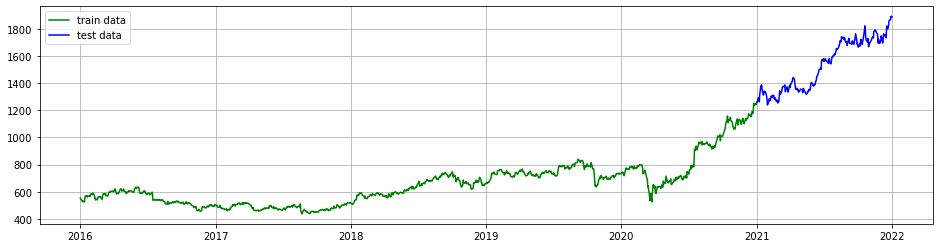

In [5]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot(df[:]['Close'],'green',label='train data')
plt.plot(test_data[:]['Close'],'blue',label='test data')
plt.legend()

p,d,q calculation

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
result=adfuller(df.Close.dropna())
print("AdY statistics",result[0])
print("p-value",result[1])

AdY statistics 1.2602598784905605
p-value 0.9963768890853028


d=no of differences,
p=pacf,
q=acf

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

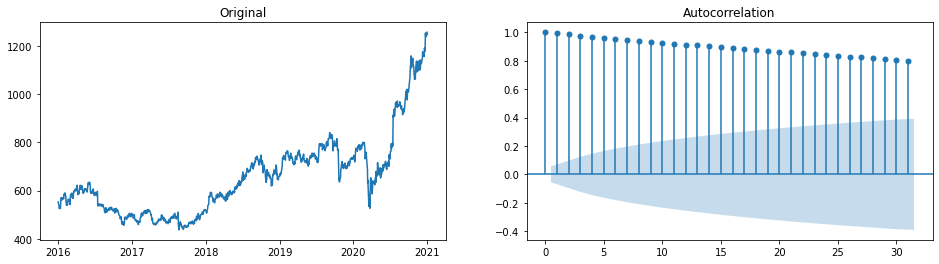

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close,ax=ax2);

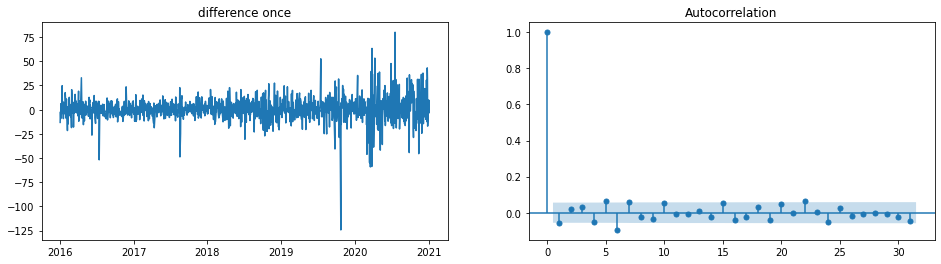

In [10]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")
plot_acf(diff,ax=ax2);

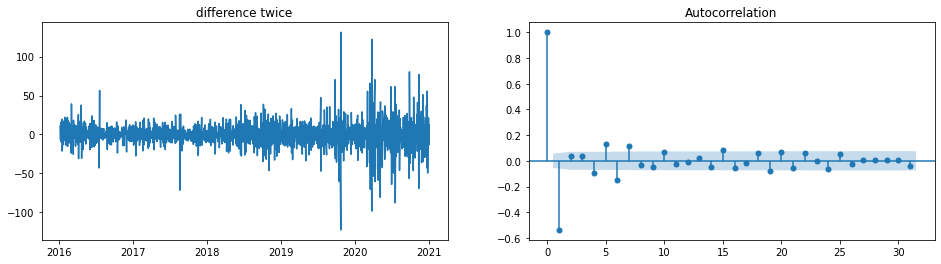

In [11]:
diff=df.Close.diff().diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference twice")
plot_acf(diff,ax=ax2);

inbuild library to find d value

In [12]:
from pmdarima.arima.utils import ndiffs

In [13]:
d=df.copy()
ndiffs(d.Close,test="adf")

1

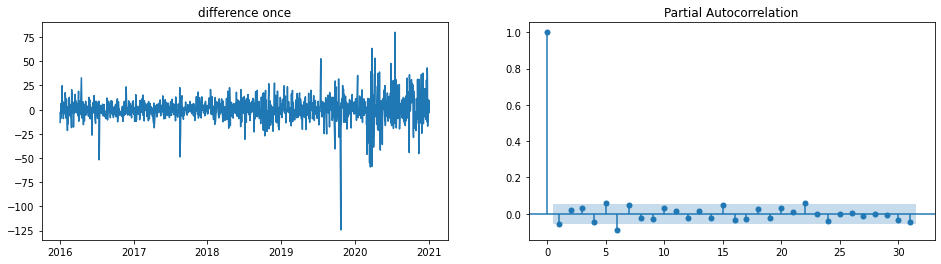

In [14]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")

plot_pacf(diff,ax=ax2);

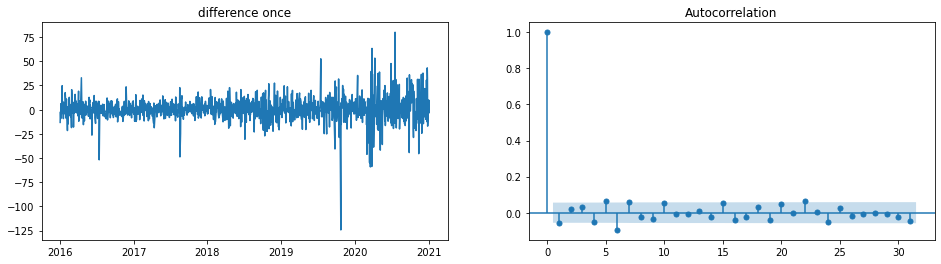

In [15]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")

plot_acf(diff,ax=ax2);

In [16]:
model_prediction=[]
n_test_obser=len(test)

In [18]:
from statsmodels.tsa.arima_model import ARIMA

In [19]:
for i in range(n_test_obser-20):
    model=ARIMA(train,order=(5,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=list(output[0])[0]
    model_prediction.append(yhat)
    actual_test_value=test[i]
    train.append(actual_test_value)
    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [20]:
length=len(test)

In [21]:
fore=[]
for i in range(20):
    model=ARIMA(train,order=(5,1,0))
    model_fit=model.fit()
    y=model_fit.forecast()
    train.append(test[length-20+i])
    fore.append(list(y[0])[0])
    

In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1480
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5987.259
Method:                       css-mle   S.D. of innovations             13.825
Date:                Sun, 20 Mar 2022   AIC                          11988.519
Time:                        18:39:04   BIC                          12025.617
Sample:                             1   HQIC                         12002.349
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9062      0.354      2.559      0.011       0.212       1.600
ar.L1.D.y      0.0086      0.026      0.333      0.739      -0.042       0.060
ar.L2.D.y     -0.0357      0.026     -1.378      0.168      -0.087       0.015
ar.L3.D.y      0.0091      0.026      0.349      0.727      -0.042       0.060
ar.L4.D.y     -0.0435      0.026     -1.678      0.093      -0.094       0.007
ar.L5.D.y      0.0468      0.026      1.802      0.071      -0.004       0.098
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3047           -1.1156j            1.7167           -0.3874
AR.2           -1.3047           +1.1156j            1.7167            0.3874
AR.3            0.7215           -1.7140j            1.8596           -0.1866
AR.4            0.7215           +1.7140j            1.8596            0.1866
AR.5            2.0969           -0.0000j            2.0969           -0.0000
-----------------------------------------------------------------------------
"""

In [23]:
len(test)

248

graph between actual predicted and forecasted


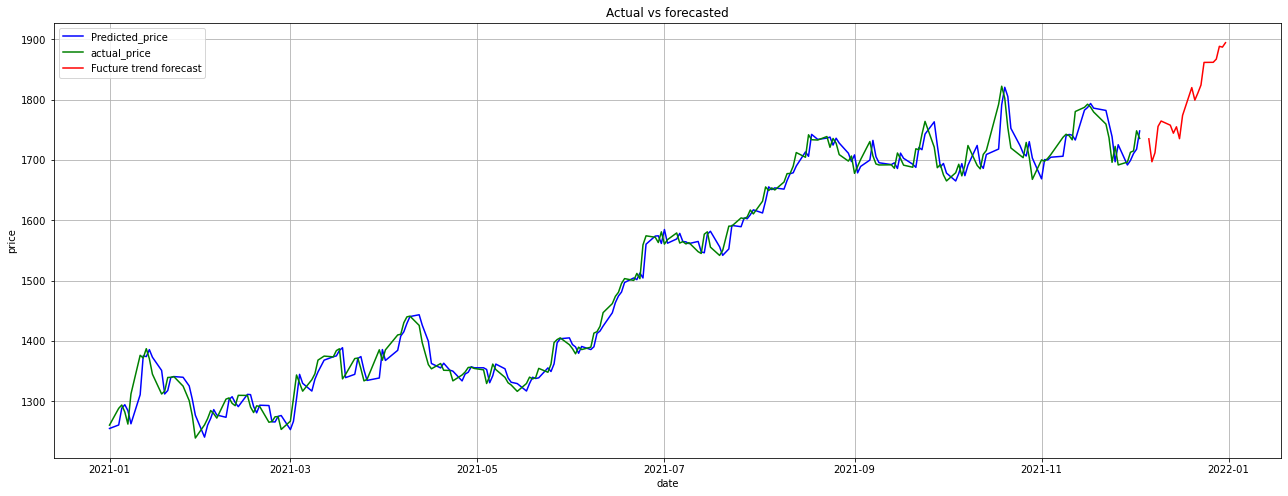

In [24]:
plt.figure(figsize=(22,8))
plt.grid(True)
data_range=test_data.index
plt.plot(data_range[:-20],model_prediction[:],color='blue',label='Predicted_price')
plt.plot(data_range[:-20],test[:-20],color='green',label='actual_price')
plt.plot(data_range[-20:],fore[:],color='red',label='Fucture trend forecast')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Actual vs forecasted')
plt.legend()


actual vs forecasted for 20 days

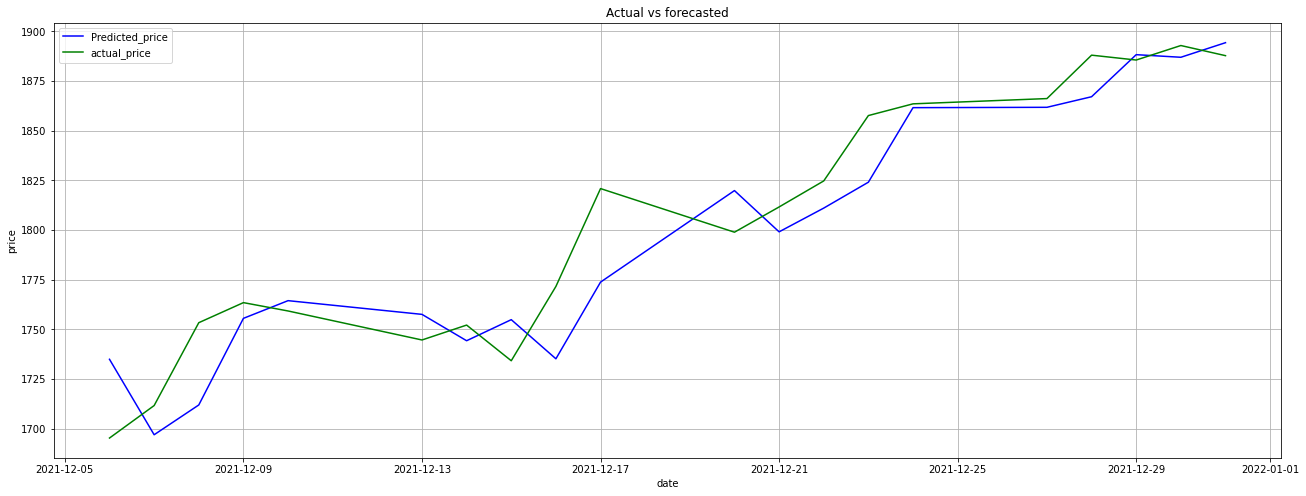

In [25]:
plt.figure(figsize=(22,8))
plt.grid(True)
data_range=test_data.index
plt.plot(data_range[-20:],fore[:],color='blue',label='Predicted_price')
plt.plot(data_range[-20:],test[-20:],color='green',label='actual_price')

plt.xlabel('date')
plt.ylabel('price')
plt.title('Actual vs forecasted')
plt.legend()


Error calculation

In [26]:
date=pd.to_datetime(data_range)

In [27]:
len(test)

248

In [28]:
dif=[]
for i in range(20):
    dif.append(test[length-20+i]-fore[i])

In [29]:
print ("{:<25} {:<25} {:<25} {:<38}".format('Date','Actual','Predicted','difference'))
for i in range(20):
   # print(test[228+i],"        ",ans[i], "        =", dif[i])
    print ("{}    {:<25} {:<25}=  {:<25}".format(data_range[length-20+i],test[length-20+i],fore[i],dif[i]))

Date                      Actual                    Predicted                 difference                            
2021-12-06 00:00:00    1695.300048828125         1734.929982854715        =  -39.629934026590036      
2021-12-07 00:00:00    1711.6500244140625        1696.9541406330518       =  14.695883781010707       
2021-12-08 00:00:00    1753.3499755859375        1711.9401021165268       =  41.40987346941074        
2021-12-09 00:00:00    1763.449951171875         1755.5343212009222       =  7.91562997095275         
2021-12-10 00:00:00    1759.25                   1764.441164795629        =  -5.191164795628993       
2021-12-13 00:00:00    1744.6500244140625        1757.5409690337667       =  -12.890944619704214      
2021-12-14 00:00:00    1752.1500244140625        1744.271331127918        =  7.878693286144426        
2021-12-15 00:00:00    1734.199951171875         1754.876796942366        =  -20.6768457704909        
2021-12-16 00:00:00    1771.5999755859375        1735.18284

In [30]:
from sklearn.metrics import mean_squared_error
mean_squa=mean_squared_error(test[length-20:length],fore[:20])
mean_squa

512.0958389868716

In [31]:
import math
root_mean_squa=math.sqrt(mean_squa)
root_mean_squa

22.629534661297647